# Présentation des données

Ces données sont le résultat d'une analyse chimique de vins cultivés dans la même région en Italie mais issus de trois cultivars différents. L'analyse a déterminé les quantités de 13 constituants présents dans chacun des trois types de vins.Il semble que l'ensemble de données initial comportait environ 30 variables, mais pour une raison quelconque, il n'y a que la version à 13 dimensions.

Les attributs sont (donnés par Riccardo Leardi, riclea@anchem.unige.it ) 

    1)  Alcool 
    2)  Acide malique 
    3)  Cendres 
    4)  Alcalinité des cendres 
    5)  Magnésium 
    6)  Phénols totaux 
    7)  Flavonoïdes 
    8)  Phénols non flavonoïdes 
    9)  Proanthocyanines 
    10) Intensité de la couleur 
    11) Teinte 
    12) OD280/OD315 des vins dilués 
    13) Proline
    
Sources : https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

🛑 *Attention la colonne Proline possède un espace dans son nom (à la fin)*

## Importation des packages et importer les données

In [57]:
#Importation des packages

import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.patches import Ellipse


In [61]:
# importation et visualisation des premières lignes


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", "Proline"]
df = pd.read_csv(url, names=column_names)

df.head()

Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [62]:
#Analyse de la dimension de la base de données


df.shape

(178, 14)

In [63]:
# Analyse du type de variable dans la base de données

df.dtypes

Class                             int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of Ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
Nonflavanoid Phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of Diluted Wines    float64
Proline                           int64
dtype: object

#### La colonne class est composée d'entiers : int64.
#### Pour identifier le cultivar, il vaut mieux faire correspondre des chaines de caractères correspondantes au cultivar. 

In [65]:
# modification de l'identification des cultivars
df_copied = df.copy()

for index, row in df_copied.iterrows():
    if row['Class'] == 1:
        df_copied.loc[index, 'Class'] = 'Cultivar 1'
    elif row['Class'] == 2:
        df_copied.loc[index, 'Class'] = 'Cultivar 2'
    elif row['Class'] == 3:
        df_copied.loc[index, 'Class'] = 'Cultivar 3'

df=df_copied
df

Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0    Cultivar 1    14.23        1.71  2.43               15.6        127   
1    Cultivar 1    13.20        1.78  2.14               11.2        100   
2    Cultivar 1    13.16        2.36  2.67               18.6        101   
3    Cultivar 1    14.37        1.95  2.50               16.8        113   
4    Cultivar 1    13.24        2.59  2.87               21.0        118   
..          ...      ...         ...   ...                ...        ...   
173  Cultivar 3    13.71        5.65  2.45               20.5         95   
174  Cultivar 3    13.40        3.91  2.48               23.0        102   
175  Cultivar 3    13.27        4.28  2.26               20.0        120   
176  Cultivar 3    13.17        2.59  2.37               20.0        120   
177  Cultivar 3    14.13        4.10  2.74               24.5         96   

     Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color Intensity   Hue  OD280/OD315 of Diluted Wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [66]:
df.dtypes

Class                            object
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of Ash               float64
Magnesium                         int64
Total Phenols                   float64
Flavanoids                      float64
Nonflavanoid Phenols            float64
Proanthocyanins                 float64
Color Intensity                 float64
Hue                             float64
OD280/OD315 of Diluted Wines    float64
Proline                           int64
dtype: object

In [67]:
# Analyse de données manquantes

df.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

Pas de données absentes dans notre jeu de données

## Analyses descriptives univariées

In [68]:
# Analyse descriptive du jeu de données
df.describe()

Alcohol  Malic Acid         Ash  Alcalinity of Ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color Intensity         Hue  OD280/OD315 of Diluted Wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [69]:
# Description des variables qualitatives
df.describe(include="object")

Class
count          178
unique           3
top     Cultivar 2
freq            71

<Axes: >

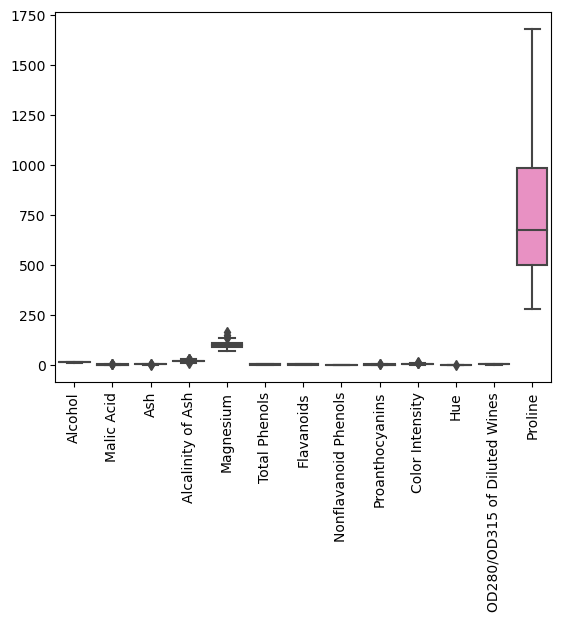

In [70]:
# Analyse descriptive des variables quantitatives
plt.xticks(rotation=90)
sns.boxplot(data=df)

La grandeur des données 'proline' et magnésium rend peu lisible le graphe précedent.En reprenant sans la colonne proline, ni magnésium l'interprétation du jeu de données sera plus facile.

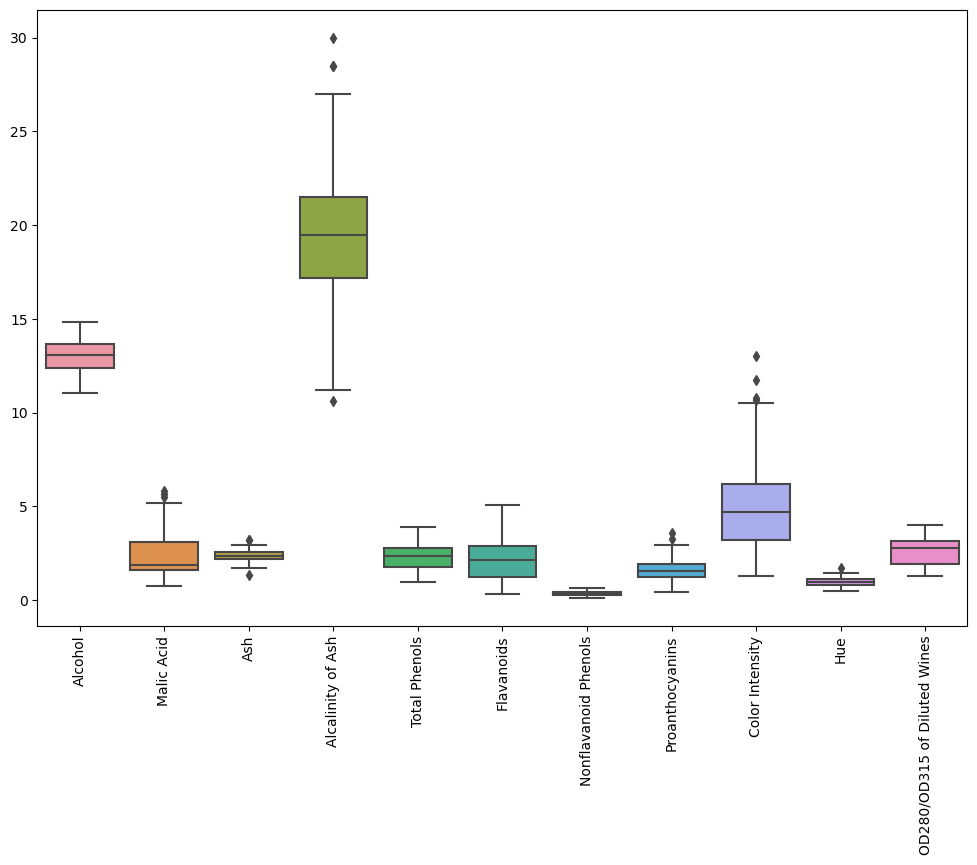

In [71]:
# Analyse descriptive des variables quantitatives (sans la colonne proline ni magnésium)
# Sélection des colonnes à inclure 
columns_to_include = [col for i, col in enumerate(df.columns) if i != len(df.columns)-1 and i !=5 ]


plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.xticks(rotation=90)

# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df[columns_to_include]

# Affichage des boxplots
sns.boxplot(data=df_subset)
plt.show()

In [73]:
columns_to_include = [col for i, col in enumerate(df.columns) if i != len(df.columns)-1 and i != 5]

# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df[columns_to_include]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Création des graphiques pour chaque cultivar
graphs = []
for cultivar in cultivars:
    # Création du graphique pour le cultivar
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(data=df_subset[df['Class'] == cultivar], ax=ax)
    ax.set_title(cultivar)
    ax.grid(True)
    ax.tick_params(axis='y', rotation=90)
    plt.close(fig)  # Fermer le graphique pour éviter son affichage par défaut
    
    # Ajout du graphique à la liste des widgets
    graphs.append(widgets.Output(layout={'overflow': 'auto'}))
    with graphs[-1]:
        display(fig)

# Création de l'accordéon
accordion = widgets.Accordion(children=graphs)
for i, cultivar in enumerate(cultivars):
    accordion.set_title(i, cultivar)

# Affichage de l'accordéon
display(accordion)

Accordion(children=(Output(layout=Layout(overflow='auto')), Output(layout=Layout(overflow='auto')), Output(lay…

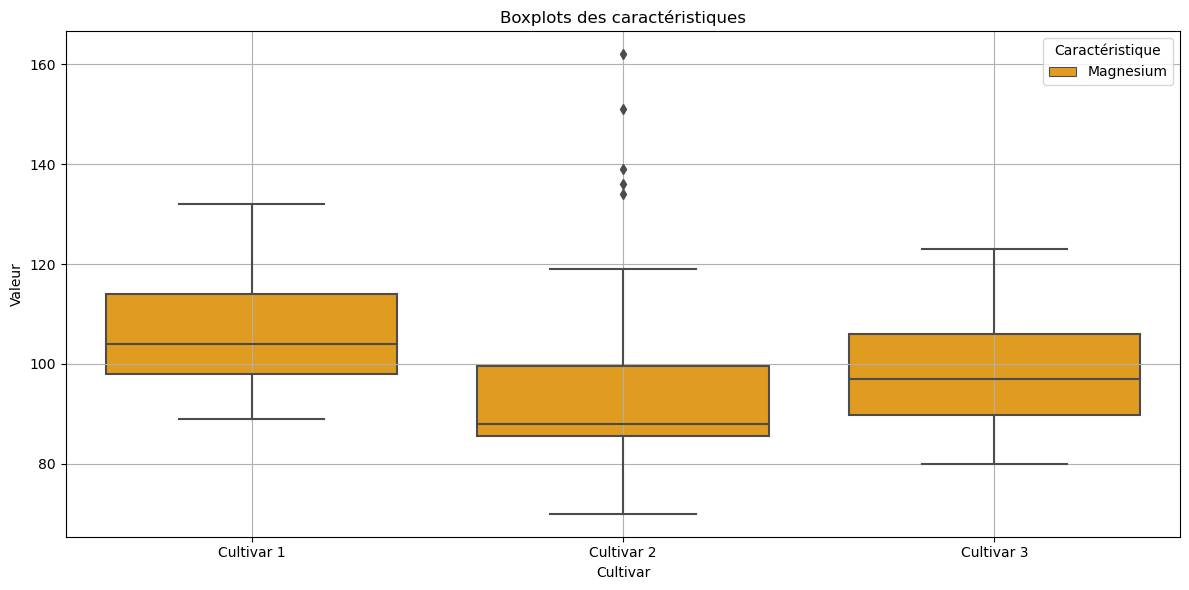

In [74]:
# Création du sous-dataframe avec les colonnes sélectionnées
df_subset = df.loc[:, ['Magnesium']]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Convertir les colonnes en une seule colonne
df_melt = pd.melt(df_subset, var_name='Caractéristique', value_name='Valeur')

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les boxplots pour chaque cultivar
sns.boxplot(data=df_melt, x=df['Class'], y='Valeur', hue='Caractéristique', ax=ax, palette =['orange'] )

# Personnalisation de l'axe x et du titre
ax.set_xticklabels(cultivars)  # Remplacer les étiquettes de l'axe x par les noms de cultivars
ax.set_xlabel('Cultivar')
ax.set_title('Boxplots des caractéristiques')

# Afficher la grille et ajuster l'espacement
ax.grid(True)
plt.tight_layout()

# Afficher le diagramme de boîte
plt.show()

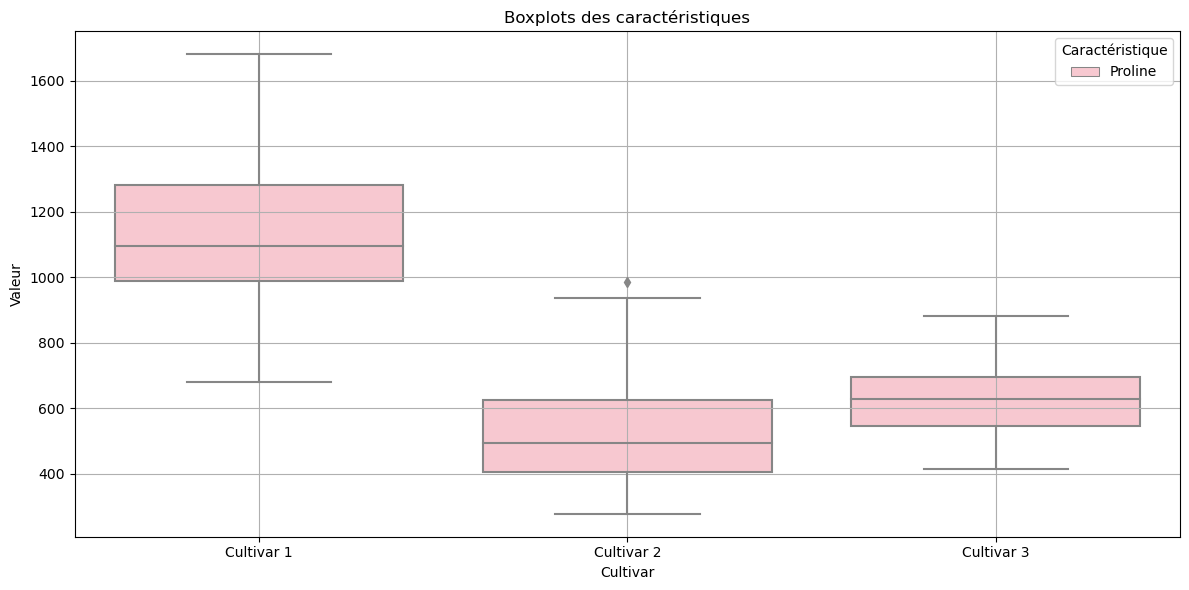

In [76]:
# Création du sous-dataframe avec les colonnes sélectionnées
column_name = 'Proline '
column_name = column_name.strip()  # Retirer les espaces en début et fin de chaîne
df_subset = df.loc[:, [column_name]]

# Liste des cultivars à traiter
cultivars = ['Cultivar 1', 'Cultivar 2', 'Cultivar 3']

# Convertir les colonnes en une seule colonne
df_melt = pd.melt(df_subset, var_name='Caractéristique', value_name='Valeur')

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les boxplots pour chaque cultivar
sns.boxplot(data=df_melt, x=df['Class'], y='Valeur', hue='Caractéristique', ax=ax, palette =['pink'] )

# Personnalisation de l'axe x et du titre
ax.set_xticklabels(cultivars)  # Remplacer les étiquettes de l'axe x par les noms de cultivars
ax.set_xlabel('Cultivar')
ax.set_title('Boxplots des caractéristiques')

# Afficher la grille et ajuster l'espacement
ax.grid(True)
plt.tight_layout()

# Afficher le diagramme de boîte
plt.show()

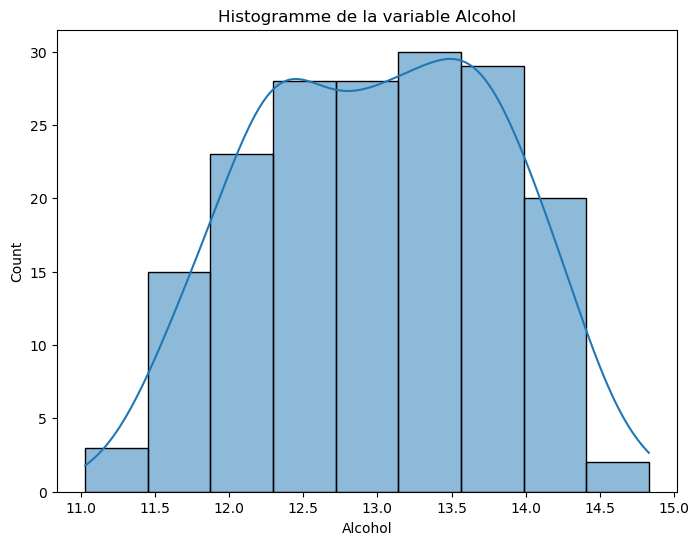

La variable Alcohol ne suit pas une loi normale (p-value=0.00034163202531285264)


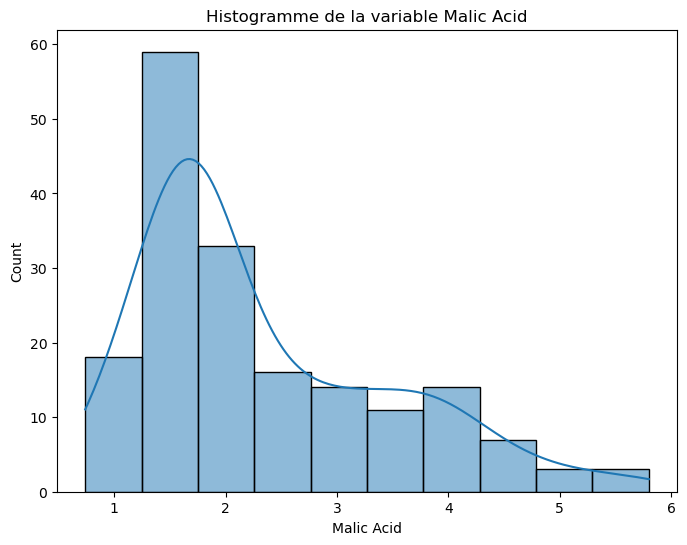

La variable Malic Acid ne suit pas une loi normale (p-value=3.1742168603714762e-06)


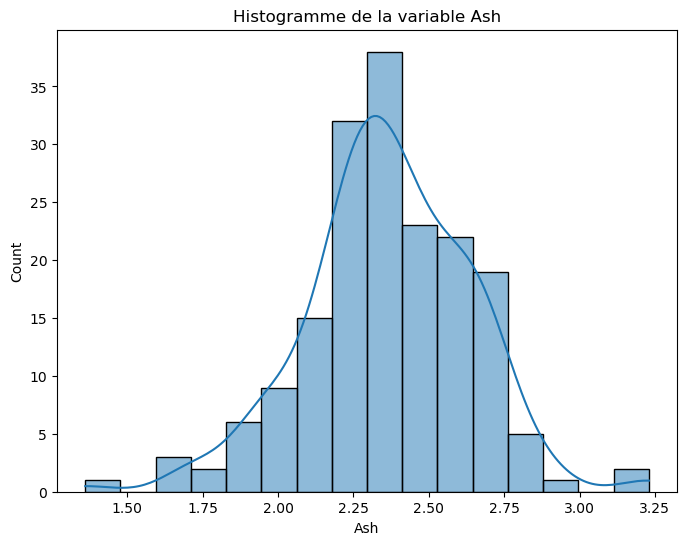

La variable Ash ne suit pas une loi normale (p-value=0.03631602067034469)


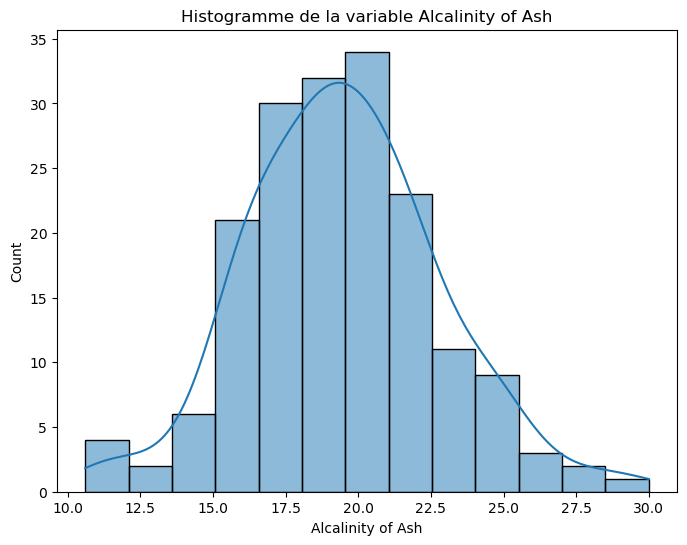

La variable Alcalinity of Ash suit une loi normale (p-value=0.21004273588925534)


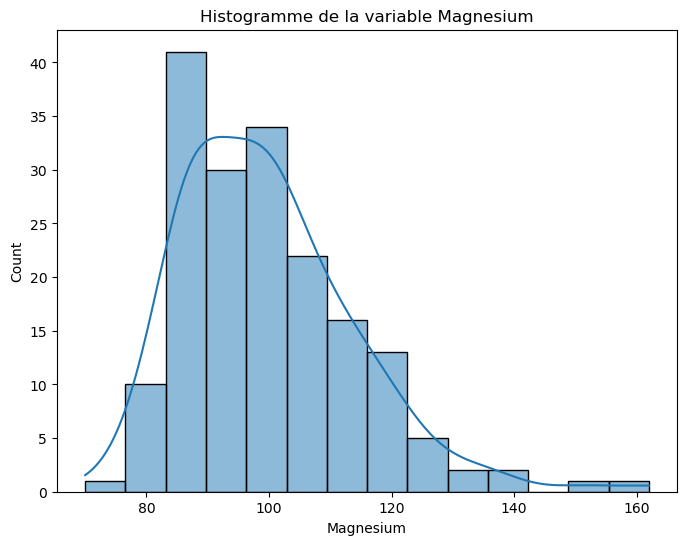

La variable Magnesium ne suit pas une loi normale (p-value=4.658884716268434e-09)


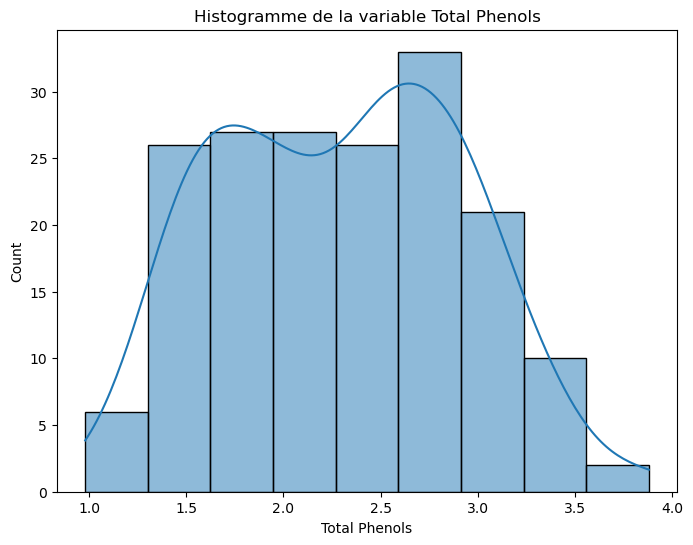

La variable Total Phenols ne suit pas une loi normale (p-value=0.0005556667174637149)


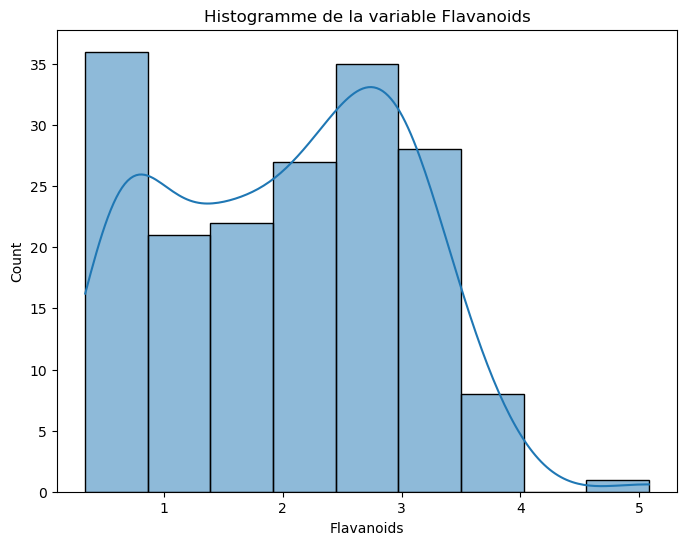

La variable Flavanoids ne suit pas une loi normale (p-value=0.00012693297763919295)


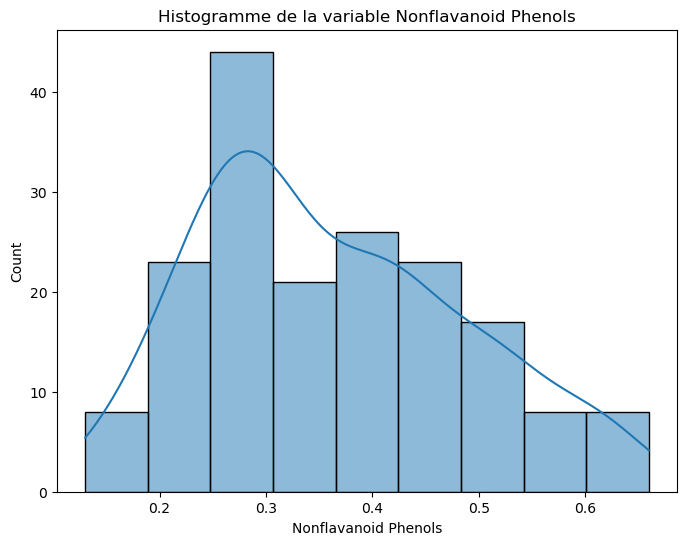

La variable Nonflavanoid Phenols ne suit pas une loi normale (p-value=0.0026647025727076653)


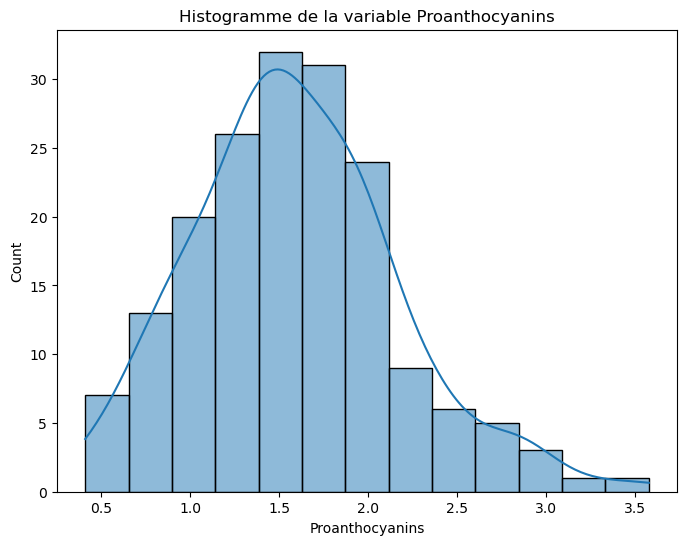

La variable Proanthocyanins ne suit pas une loi normale (p-value=0.008000813483971013)


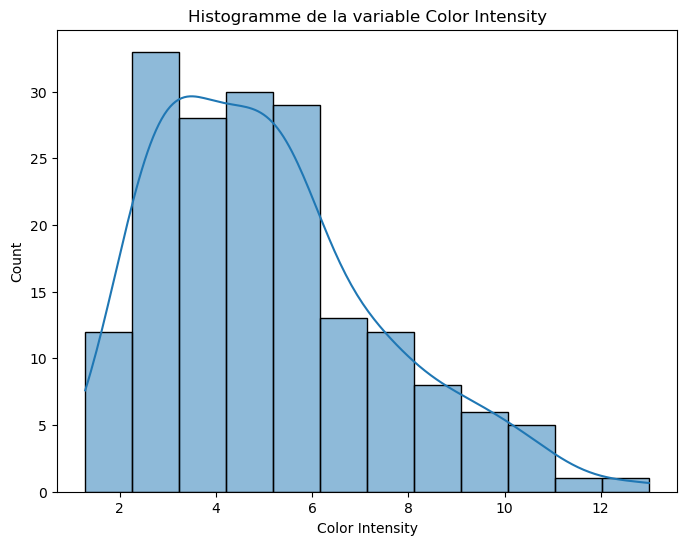

La variable Color Intensity ne suit pas une loi normale (p-value=5.31947611640046e-05)


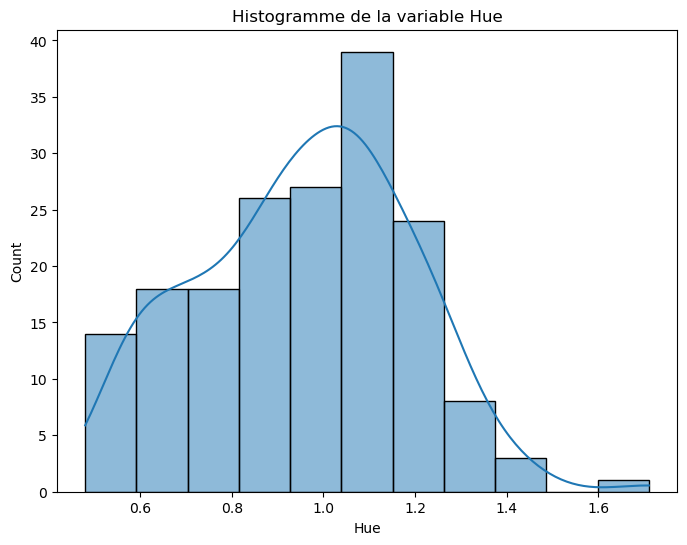

La variable Hue suit une loi normale (p-value=0.594729042205703)


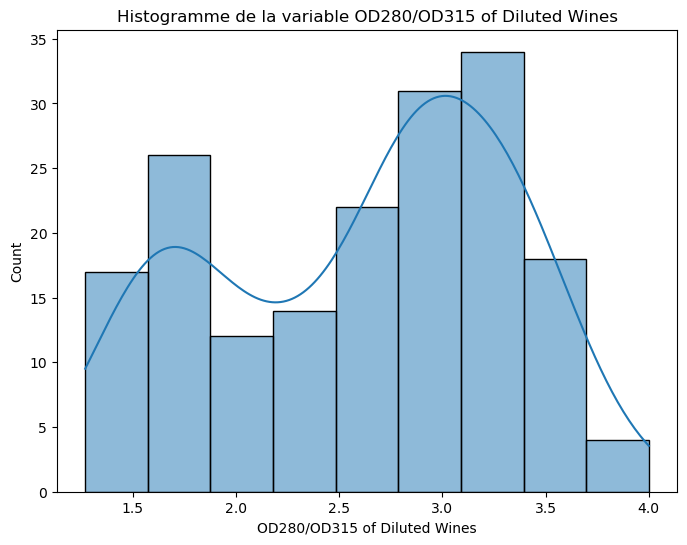

La variable OD280/OD315 of Diluted Wines ne suit pas une loi normale (p-value=4.8789809118220485e-11)


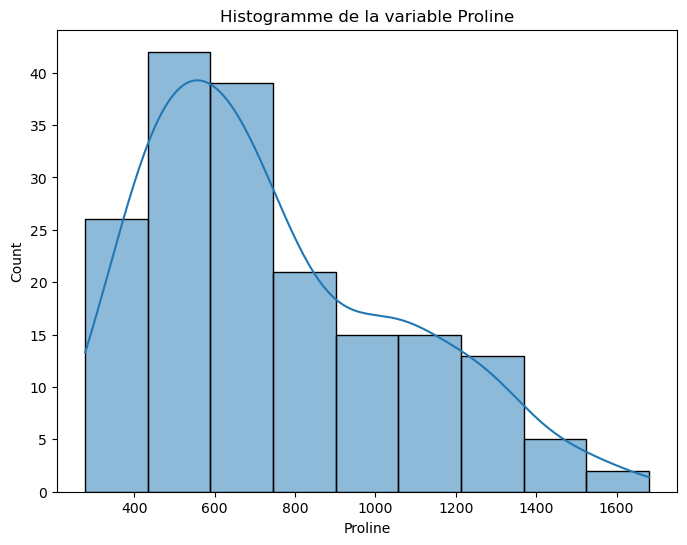

La variable Proline ne suit pas une loi normale (p-value=0.0004256462644890612)


In [77]:
# Analyse de la normalité


# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

<Axes: xlabel='Class', ylabel='count'>

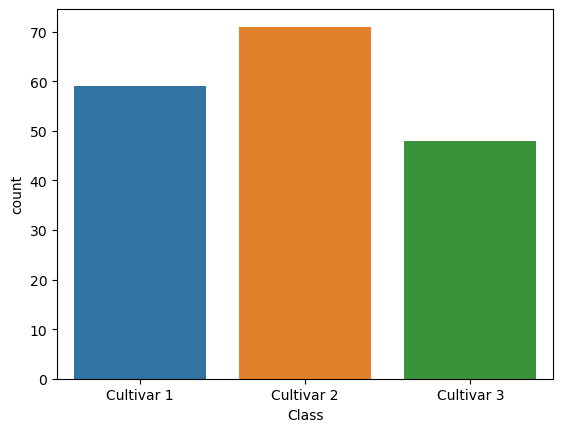

In [78]:
# Analyse de la variable qualitative

sns.countplot(x=df['Class'])

([<matplotlib.patches.Wedge at 0x1b0f983dc00>,
 [Text(0.3436094134029147, 1.0449557746722609, 'Cultivar 2'),
  Text(-1.0106064575192055, -0.4343668818182187, 'Cultivar 1'),
  Text(0.7283164304833661, -0.8243513674932361, 'Cultivar 3')])

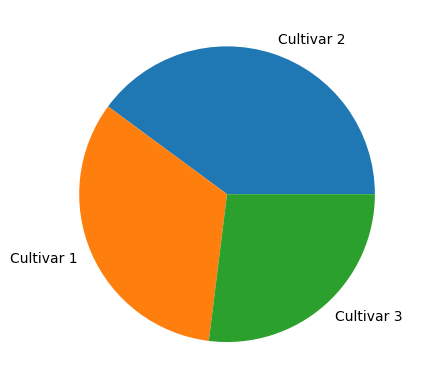

In [79]:
# Création d'un tableau de fréquences pour les différents cultivars
freq_table = (df['Class'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableau de fréquence


plt.pie(freq_table,labels=freq_table.index)

La répartition reste relativement équilibrée entre les différents cultivars

# Analyse bivariées

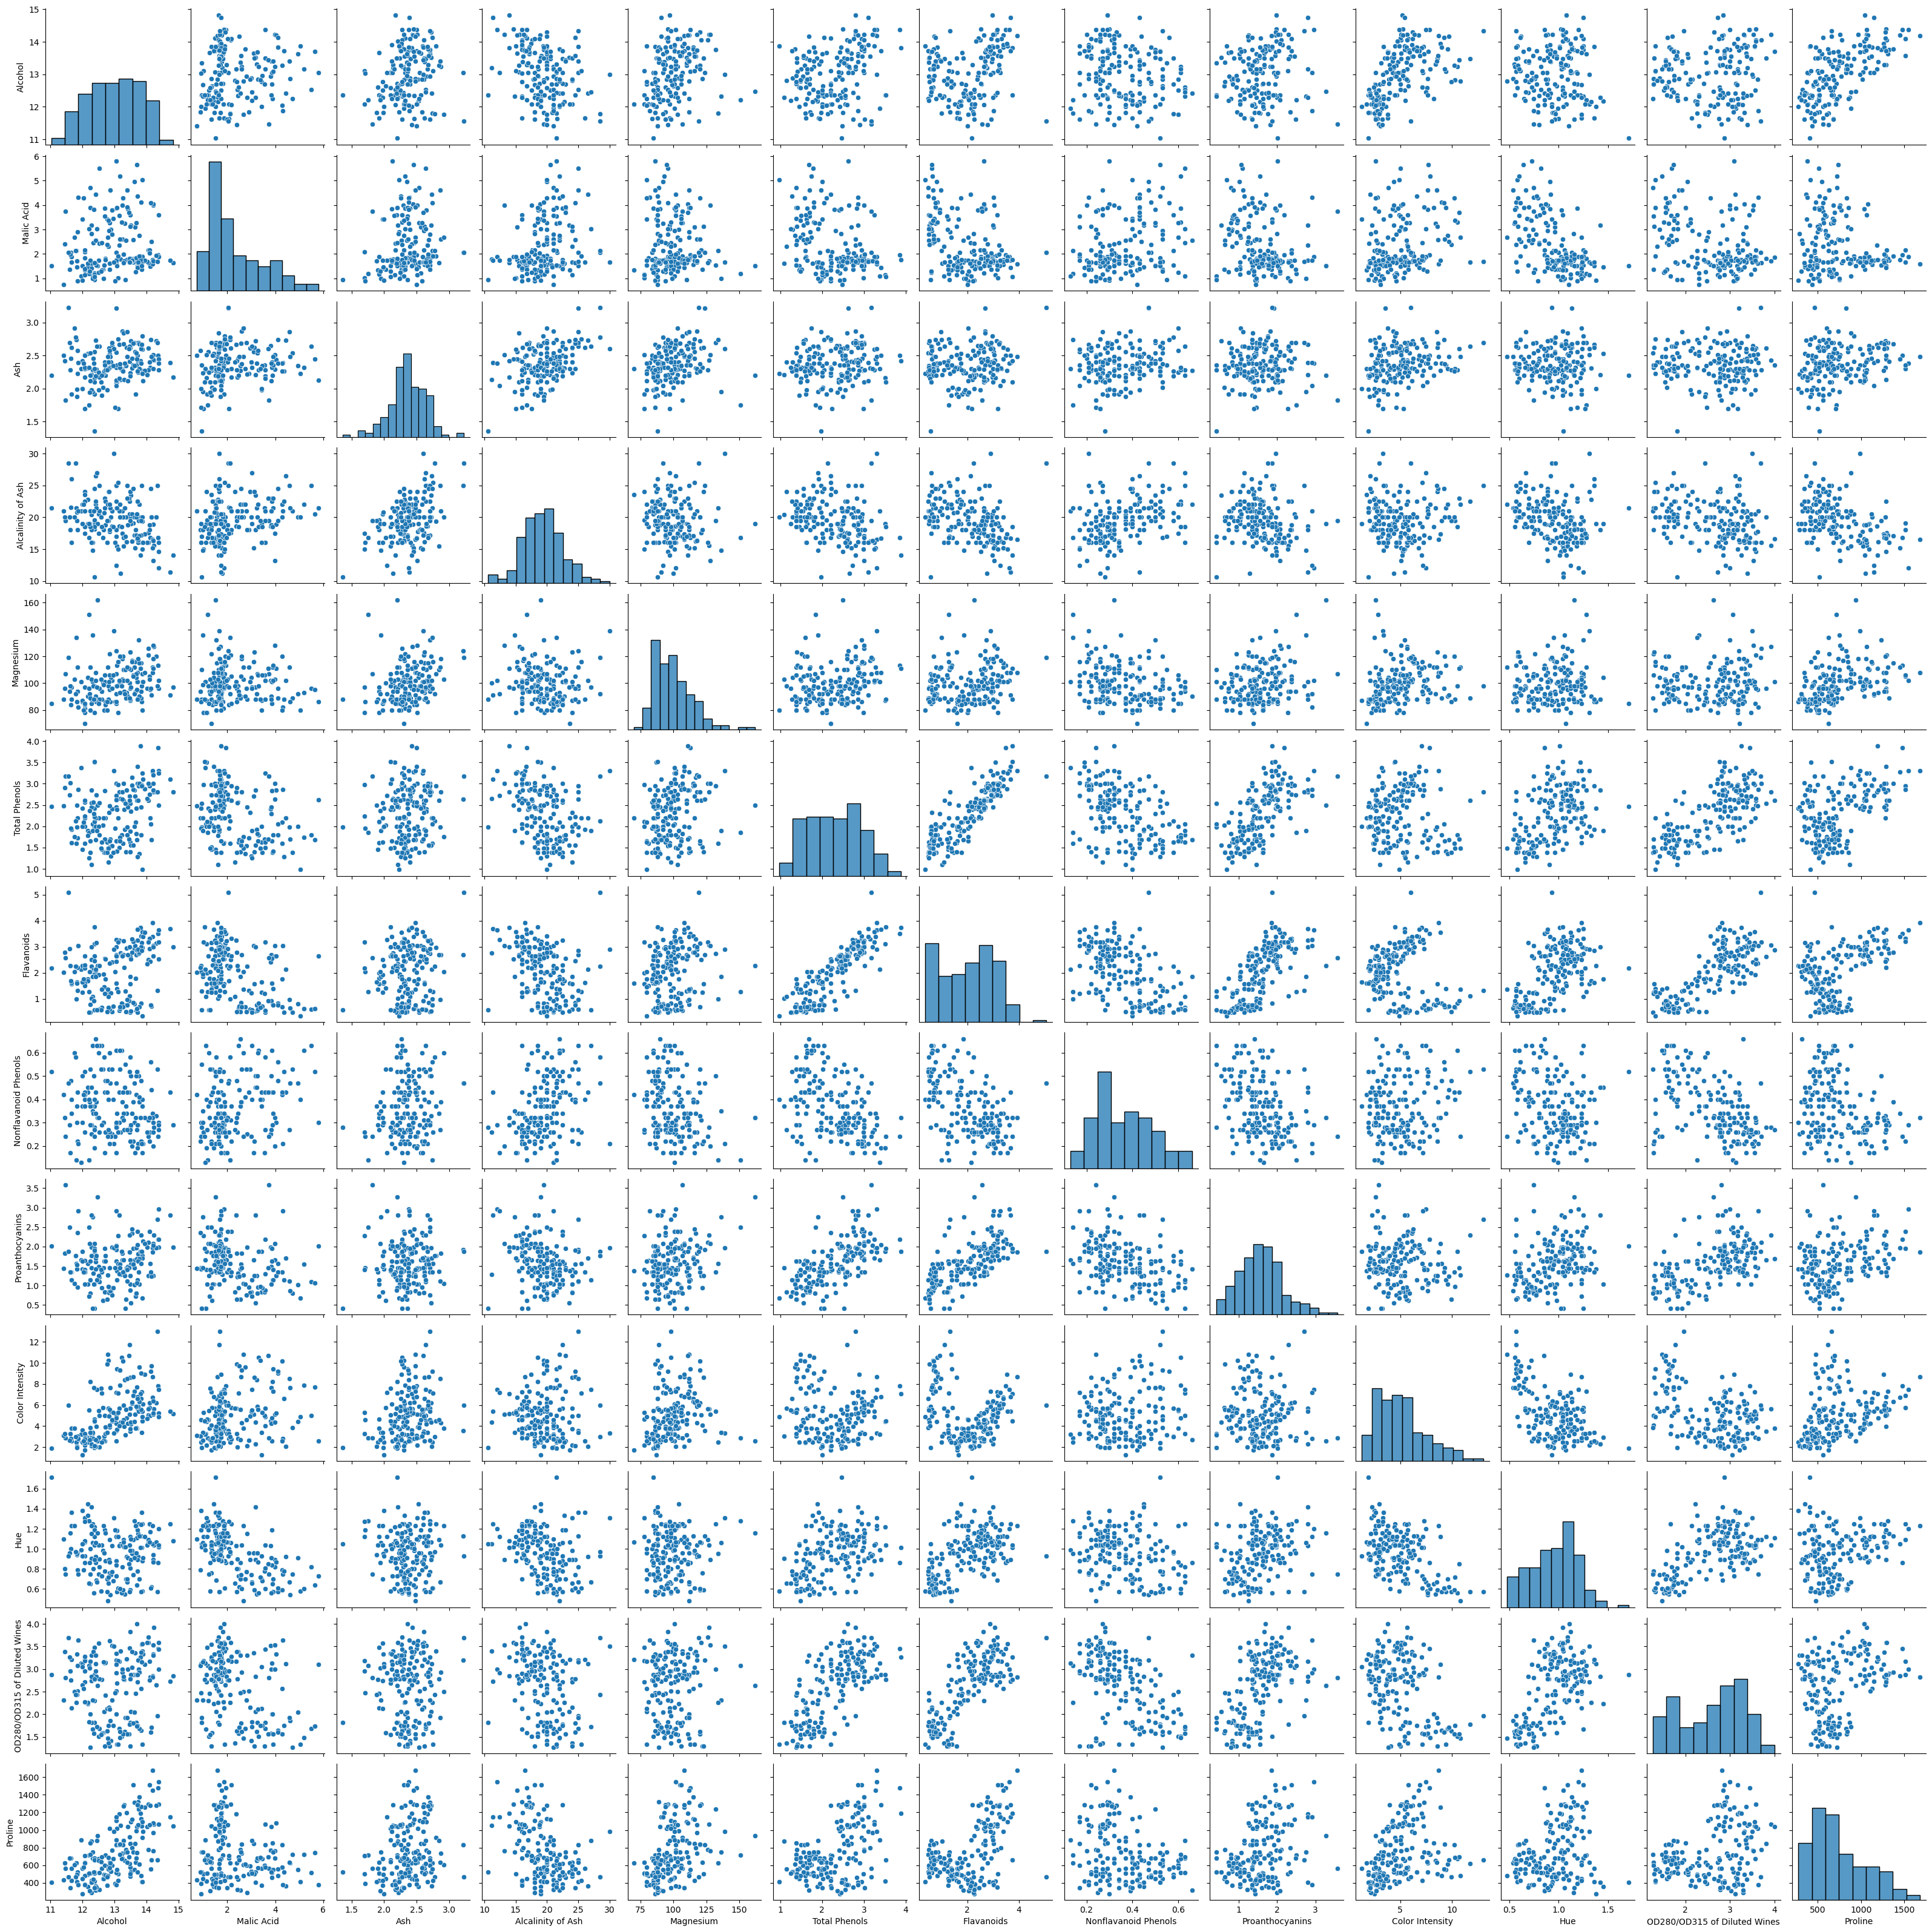

In [80]:
# Relation entre les variables quantitatives

sns.pairplot(df)

Le problème de la haute dimentionnalité est que l'analyse bivariée est difficilement interprétable

C:\Users\PC\AppData\Local\Temp\ipykernel_15500\1555525462.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

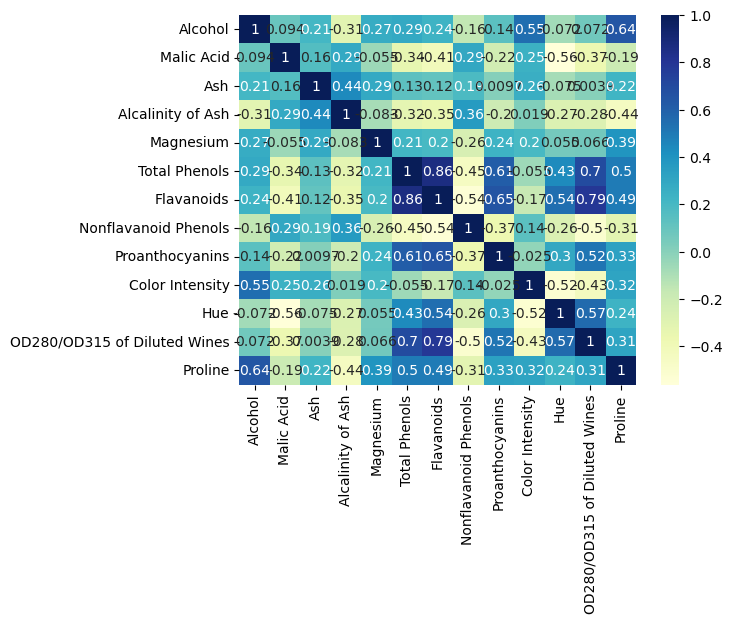

In [81]:
# Obtenir le tableau de corélation et la heatmap

corr_matrix = df.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

Il est possible de voir des corrélations fortes entre certaines variables. Par exemple, Les flavonoïds avec la dilution OD280/OD315. Il y a aussi des corrélations négatives entre l'alcool et les Prolines. 

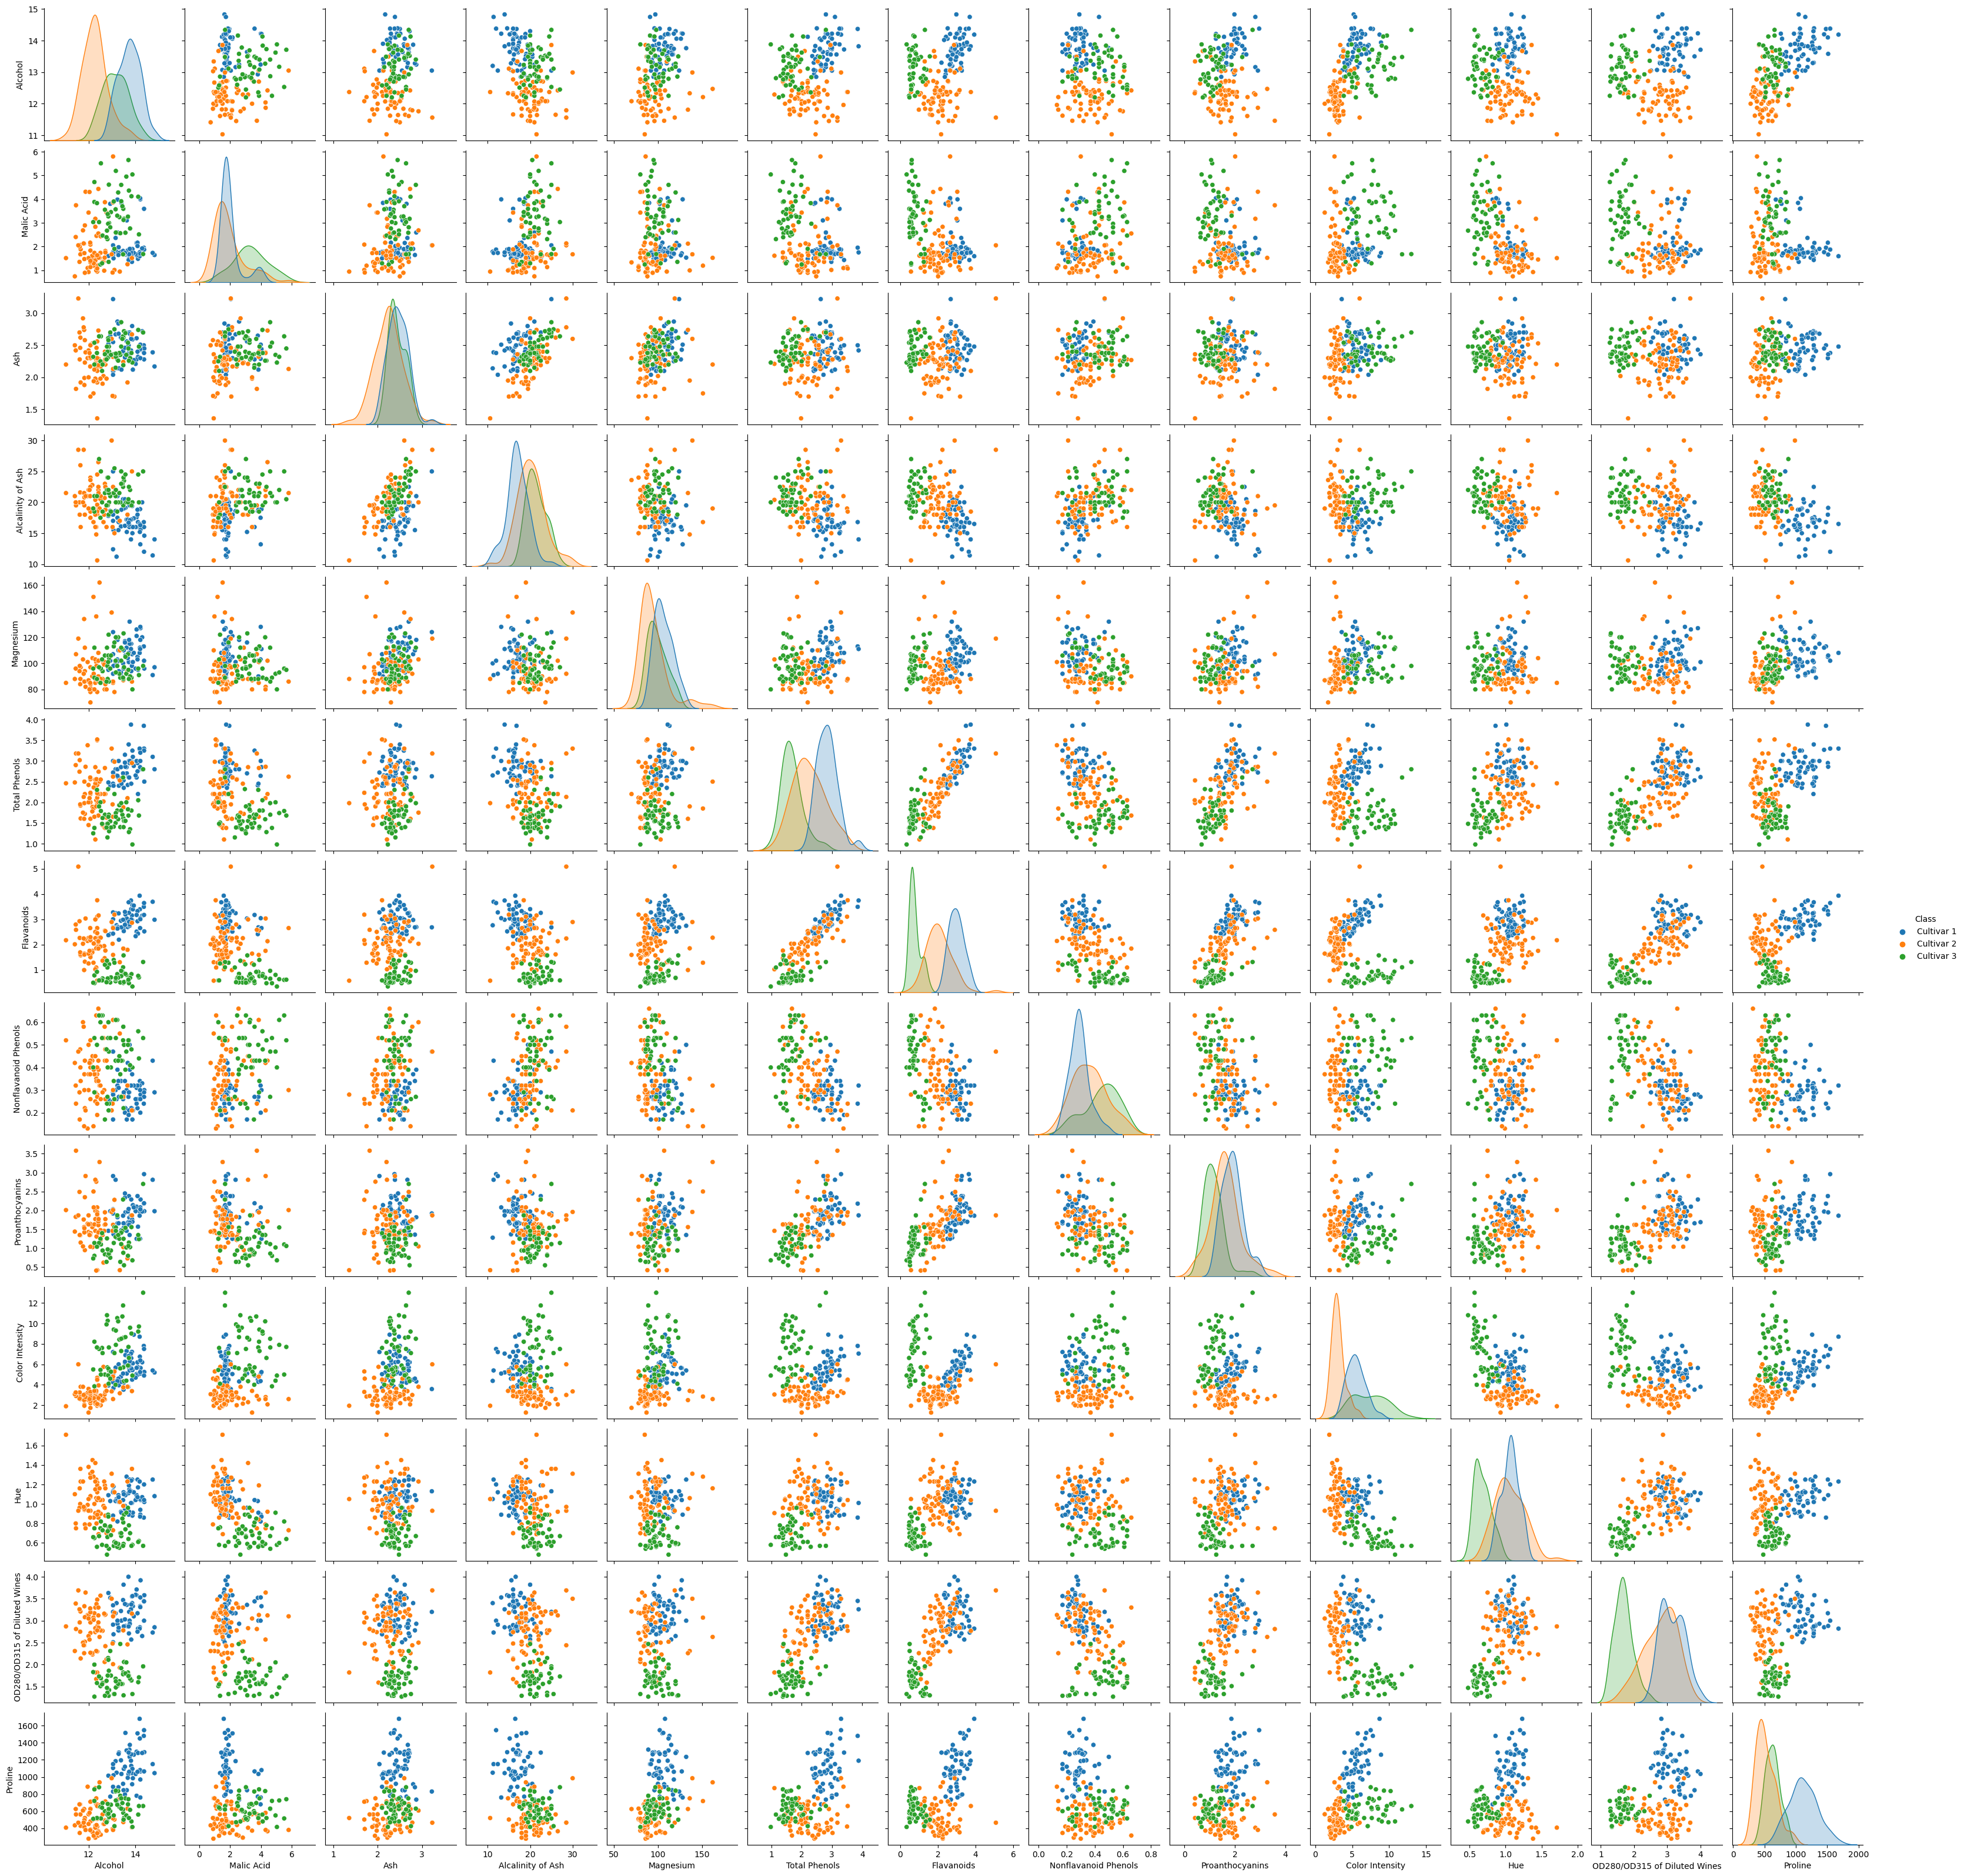

In [82]:
# pairplot

p=sns.pairplot(df, hue = 'Class')

Il y a quelques clusters observables. Une idée de Machine Learning possible à appliquer sur ce dataset serait une SVM. 

In [83]:
 # Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in df.columns[1:]:
    _, p_value = stats.kruskal(*[df[column][df['Class'] == variety] for variety in df['Class'].unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")


La variable Alcohol est significativement différente entre les espèces (p-value=1.6600250601216383e-24)
La variable Malic Acid est significativement différente entre les espèces (p-value=1.357931639757843e-11)
La variable Ash est significativement différente entre les espèces (p-value=9.497749976424641e-06)
La variable Alcalinity of Ash est significativement différente entre les espèces (p-value=9.404058619703899e-14)
La variable Magnesium est significativement différente entre les espèces (p-value=1.5450460673846685e-09)
La variable Total Phenols est significativement différente entre les espèces (p-value=5.0306207978166115e-21)
La variable Flavanoids est significativement différente entre les espèces (p-value=4.70559397607555e-29)
La variable Nonflavanoid Phenols est significativement différente entre les espèces (p-value=2.2150945192836892e-09)
La variable Proanthocyanins est significativement différente entre les espèces (p-value=1.2179725746793306e-13)
La variable Color Intensity 

In [84]:
# Confirmation des liaisons avec un test de Kruskal-Wallis pour chaque variable
significant_vars = []
non_significant_vars = []

for column in df.columns[1:]:
    _, p_value = stats.kruskal(*[df[column][df['Class'] == variety] for variety in df['Class'].unique()])
    if p_value < 0.05:
        significant_vars.append(column)
        #print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        non_significant_vars.append(column)
        #print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")

print("Variables significativement différentes entre les espèces:", significant_vars)
print("Variables non significativement différentes entre les espèces:", non_significant_vars)


Variables significativement différentes entre les espèces: ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']
Variables non significativement différentes entre les espèces: []


## Analyse multivariée avec l'ACP

### Construction de l'ACP

In [14]:
# Séparer les étiquettes de classe et les données
X = data.drop("Class", axis=1)
y = data["Class"]

In [15]:
# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Appliquer l'ACP
n_components = 2  # Nombre de composantes principales (ici deux suffisent)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df["Class"] = y

In [18]:
# Mapping des étiquettes de classe à des valeurs numériques (étape importante car source d'erreurs)
class_mapping = {"Cultivar 1": 0, "Cultivar 2": 1, "Cultivar 3": 2}
pca_df["ClassNumeric"] = pca_df["Class"].map(class_mapping) 

In [19]:
# Afficher les résultats
print(pca_df.head())

        PC1       PC2  Class  ClassNumeric
0  3.316751 -1.443463      1           NaN
1  2.209465  0.333393      1           NaN
2  2.516740 -1.031151      1           NaN
3  3.757066 -2.756372      1           NaN
4  1.008908 -0.869831      1           NaN


### Aide à l'interprétation

#### Choix du nombre d'axe

In [20]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

# Trier les valeurs propres dans l'ordre décroissant

comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1       4.732437                  36.0                   36.0
1      Dim2       2.511081                  19.0                   55.0

Text(3.25, 26, '25%')

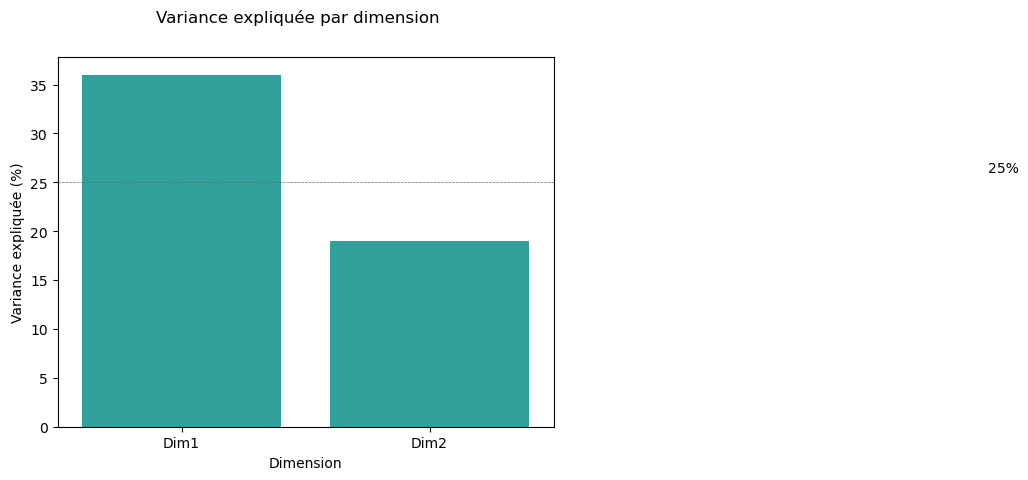

In [21]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [25]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared.T, columns=[f"PC{i+1}" for i in range(n_components)])
df_cos_squared.index = X.columns

print(df_cos_squared)

                                   PC1       PC2
Alcohol                       0.020831  0.233919
Malic Acid                    0.060117  0.050594
Ash                           0.000004  0.099899
Alcalinity of Ash             0.057274  0.000112
Magnesium                     0.020162  0.089781
Total Phenols                 0.155757  0.004230
Flavanoids                    0.178873  0.000011
Nonflavanoid Phenols          0.089122  0.000828
Proanthocyanins               0.098238  0.001545
Color Intensity               0.007853  0.280895
Hue                           0.088040  0.077972
OD280/OD315 of Diluted Wines  0.141502  0.027059
Proline                       0.082227  0.133154


### Graphe de L'ACP et Cercle de corrélation

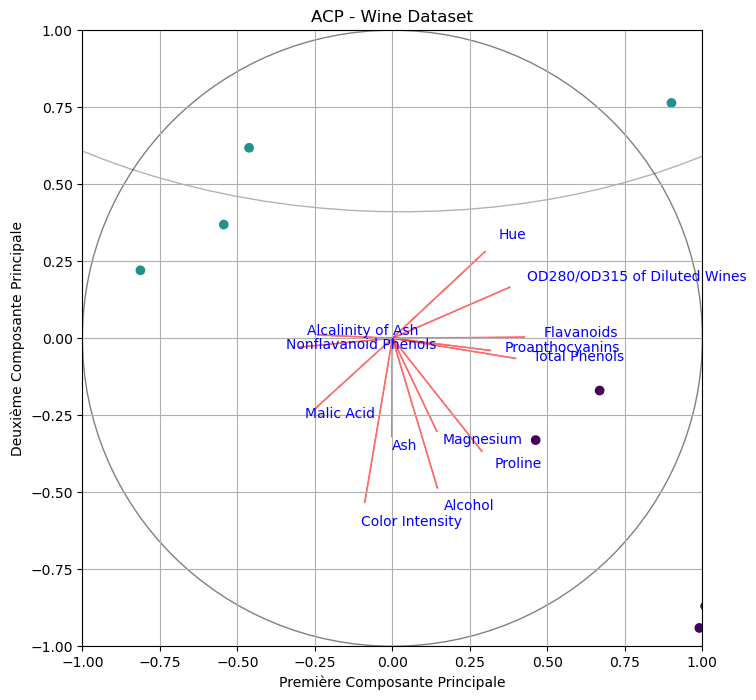

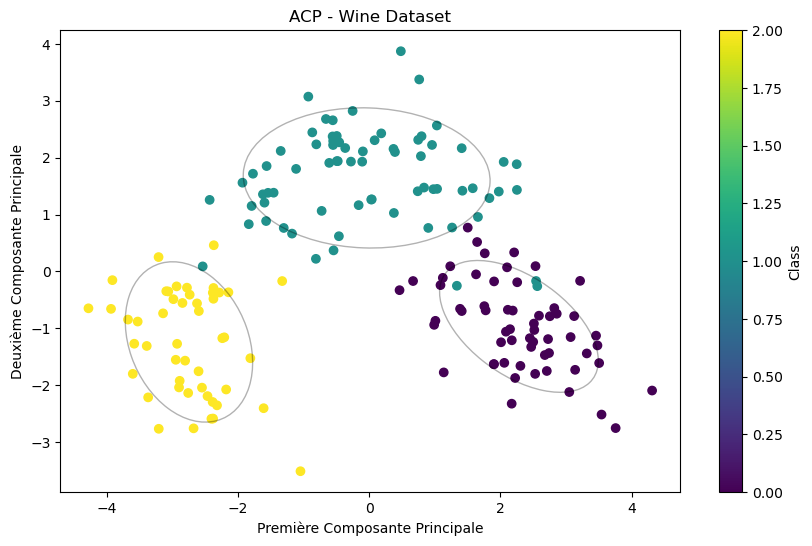

In [51]:
# Tracer le cercle de corrélation
feature_names = X.columns
plt.figure(figsize=(8, 8))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["ClassNumeric"], cmap="viridis")
plt.xlabel("Première Composante Principale")
plt.ylabel("Deuxième Composante Principale")
plt.title("ACP - Wine Dataset")

# Tracer le cercle de corrélation
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
plt.gca().add_artist(circle)

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature, color='b')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()

# Tracer les ellipses de contour
for class_label in pca_df["Class"].unique():
    class_data = pca_df[pca_df["Class"] == class_label][["PC1", "PC2"]]
    class_mean = class_data.mean()
    cov_matrix = class_data.cov()
    eigvalues, eigvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))
    width = 3 * np.sqrt(eigvalues[0])  # Largeur de l'ellipse augmentée
    height = 3 * np.sqrt(eigvalues[1])  # Hauteur de l'ellipse augmentée

    ellipse = Ellipse(xy=class_mean, width=width, height=height, angle=angle, facecolor='none', edgecolor='black', alpha=0.3)
    plt.gca().add_patch(ellipse)

plt.show()

# Tracer un graphique des deux premières composantes principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["ClassNumeric"], cmap="viridis")
plt.xlabel("Première Composante Principale")
plt.ylabel("Deuxième Composante Principale")
plt.title("ACP - Wine Dataset")
plt.colorbar(label="Class")

# Tracer les ellipses de contour
for class_label in pca_df["Class"].unique():
    class_data = pca_df[pca_df["Class"] == class_label][["PC1", "PC2"]]
    class_mean = class_data.mean()
    cov_matrix = class_data.cov()
    eigvalues, eigvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigvectors[:, 0][::-1]))
    width = 3 * np.sqrt(eigvalues[0])  # Largeur de l'ellipse augmentée
    height = 3 * np.sqrt(eigvalues[1])  # Hauteur de l'ellipse augmentée

    ellipse = Ellipse(xy=class_mean, width=width, height=height, angle=angle, facecolor='none', edgecolor='black', alpha=0.3)
    plt.gca().add_patch(ellipse)

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

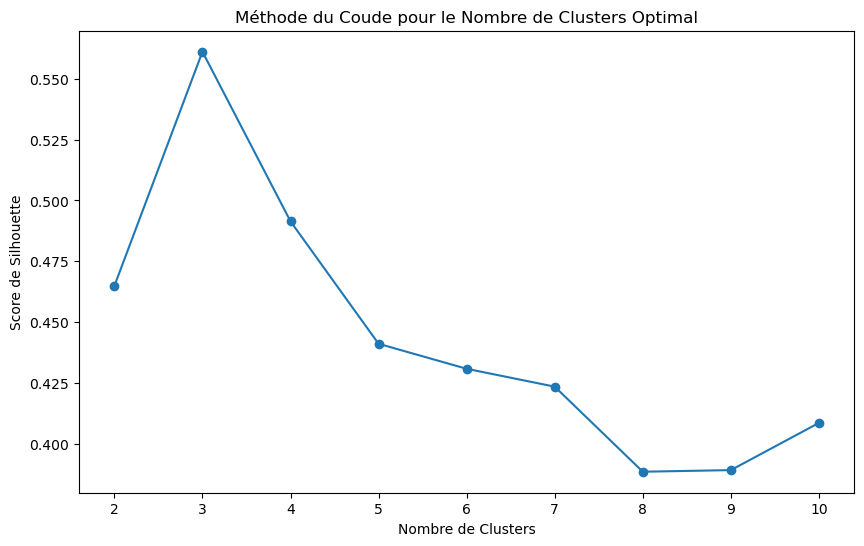

In [58]:
# Définir la variable d'environnement OMP_NUM_THREADS à 1
os.environ['OMP_NUM_THREADS'] = '1'

# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Nombre maximal de clusters à tester
max_clusters = 10

for num_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le score de silhouette pour chaque nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel("Nombre de Clusters")
plt.ylabel("Score de Silhouette")
plt.title("Méthode du Coude pour le Nombre de Clusters Optimal")
plt.xticks(range(2, max_clusters+1))
plt.show()

Il y a deux coudes visibles : 5 et 8. Normalement, la méthode du coude sert à connaître le nombre de cluster optimal mais ici il ya 3 classes. 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


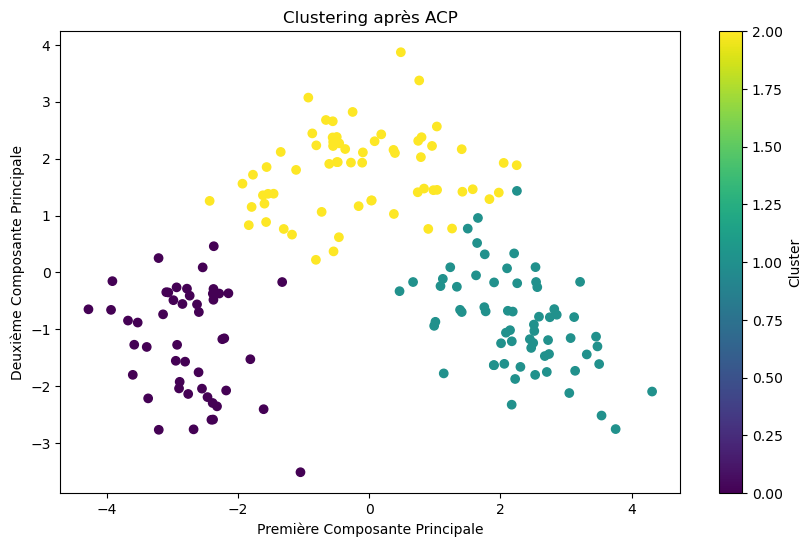

In [41]:
# Nombre de clusters
num_clusters = 3

# Appliquer K-means sur les composantes principales obtenues à partir de l'ACP
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Ajouter les étiquettes de cluster au DataFrame
pca_df["Cluster"] = cluster_labels

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=cluster_labels, cmap="viridis")
plt.xlabel("Première Composante Principale")
plt.ylabel("Deuxième Composante Principale")
plt.title("Clustering après ACP")
plt.colorbar(label="Cluster")
plt.show()